<a href="https://colab.research.google.com/github/Anoushehm/intro-ml-course-winter2026/blob/main/2_HAD5016_W26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Programmer:** Valeria, Urim


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 1) Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 2) Paths — EDIT THESE AS NEEDED
DATA_DIR = "/content/drive/My Drive/Study_Phd/HAD5016/Datathon 2"  # <-- change to your folder
INPUT_CSV = "Datathon #2 - Cardiovascular Health.csv"  # <-- confirm the file name
in_path = os.path.join(DATA_DIR, INPUT_CSV)
print(in_path)

/content/drive/My Drive/Study_Phd/HAD5016/Datathon 2/Datathon #2 - Cardiovascular Health.csv


In [ ]:
df = pd.read_csv(in_path)
df=df.drop('id',axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private Sector,Urban,228.69,36.6,Former Smoker,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,Never Smoker,1
2,Male,80,0,1,Yes,Private Sector,Rural,105.92,32.5,Never Smoker,1
3,Female,49,0,0,Yes,Private Sector,Urban,171.23,34.4,Active Smoker,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,Never Smoker,1


In [ ]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
df['residence_type'] = df['residence_type'].map({'Rural': 0, 'Urban': 1})
df['smoking_status'] = df['smoking_status'].map({'Active Smoker': 'current', 'Never Smoker': 'no', 'Former Smoker': 'no', 'Unknown':'missing'})
df.head()

,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke
0,0.0,67,0,1,1,Private Sector,1,228.69,36.6,no,1
1,1.0,61,0,0,1,Self-employed,0,202.21,NaN,no,1
2,0.0,80,0,1,1,Private Sector,0,105.92,32.5,no,1
3,1.0,49,0,0,1,Private Sector,1,171.23,34.4,current,1
4,1.0,79,1,0,1,Self-employed,0,174.12,24.0,no,1


In [ ]:
df = pd.get_dummies(
    df,
    columns=['smoking_status'],
    prefix='smoking',
    drop_first=True, # to avoid colinearity
    dtype=int
)

df = pd.get_dummies(
    df,
    columns=['employment'],
    prefix='employ',
    drop_first=True, # to avoid colinearity
    dtype=int
)
df.head()

,gender,age,hypertension,heart_disease,ever_married,residence_type,random_glucose,bmi,stroke,smoking_missing,smoking_no,employ_Public Sector,employ_Self-employed,employ_Unemployed
0,0.0,67,0,1,1,1,228.69,36.6,1,0,1,0,0,0
1,1.0,61,0,0,1,0,202.21,NaN,1,0,1,0,1,0
2,0.0,80,0,1,1,0,105.92,32.5,1,0,1,0,0,0
3,1.0,49,0,0,1,1,171.23,34.4,1,0,0,0,0,0
4,1.0,79,1,0,1,0,174.12,24.0,1,0,1,0,1,0


In [ ]:
df.shape

(4254, 14)

In [ ]:
df.dtypes

,0
gender,float64
age,int64
hypertension,int64
heart_disease,int64
ever_married,int64
residence_type,int64
random_glucose,float64
bmi,float64
stroke,int64
smoking_missing,int64


In [ ]:
description = df.describe()
description

,gender,age,hypertension,heart_disease,ever_married,residence_type,random_glucose,bmi,stroke,smoking_missing,smoking_no,employ_Public Sector,employ_Self-employed,employ_Unemployed
count,4253.000000,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000,4073.000000,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000
mean,0.605690,50.202163,0.116831,0.064645,0.788199,0.509873,108.514394,30.432752,0.058063,0.202633,0.614010,0.153032,0.189704,0.001175
std,0.488759,17.829035,0.321257,0.245927,0.408632,0.499961,47.769400,7.235143,0.233890,0.402008,0.486885,0.360061,0.392113,0.034267
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.000000,0.000000,0.000000,1.000000,0.000000,77.482500,25.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,50.500000,0.000000,0.000000,1.000000,1.000000,92.465000,29.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,64.000000,0.000000,0.000000,1.000000,1.000000,116.135000,34.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
description = df.drop(['hypertension', 'heart_disease', 'stroke', 'ever_married', 'residence_type', 'smoking_no', 'smoking_missing', 'employ_Public Sector',	'employ_Unemployed'], axis=1)

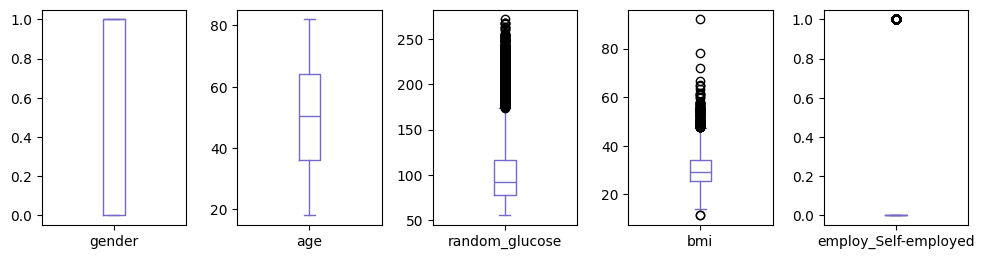

In [ ]:
description.plot(kind='box', subplots=True, layout=(2, 5), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

In [ ]:
print(df.isnull().sum())

gender                    1
age                       0
hypertension              0
heart_disease             0
ever_married              0
residence_type            0
random_glucose            0
bmi                     181
stroke                    0
smoking_missing           0
smoking_no                0
employ_Public Sector      0
employ_Self-employed      0
employ_Unemployed         0
dtype: int64


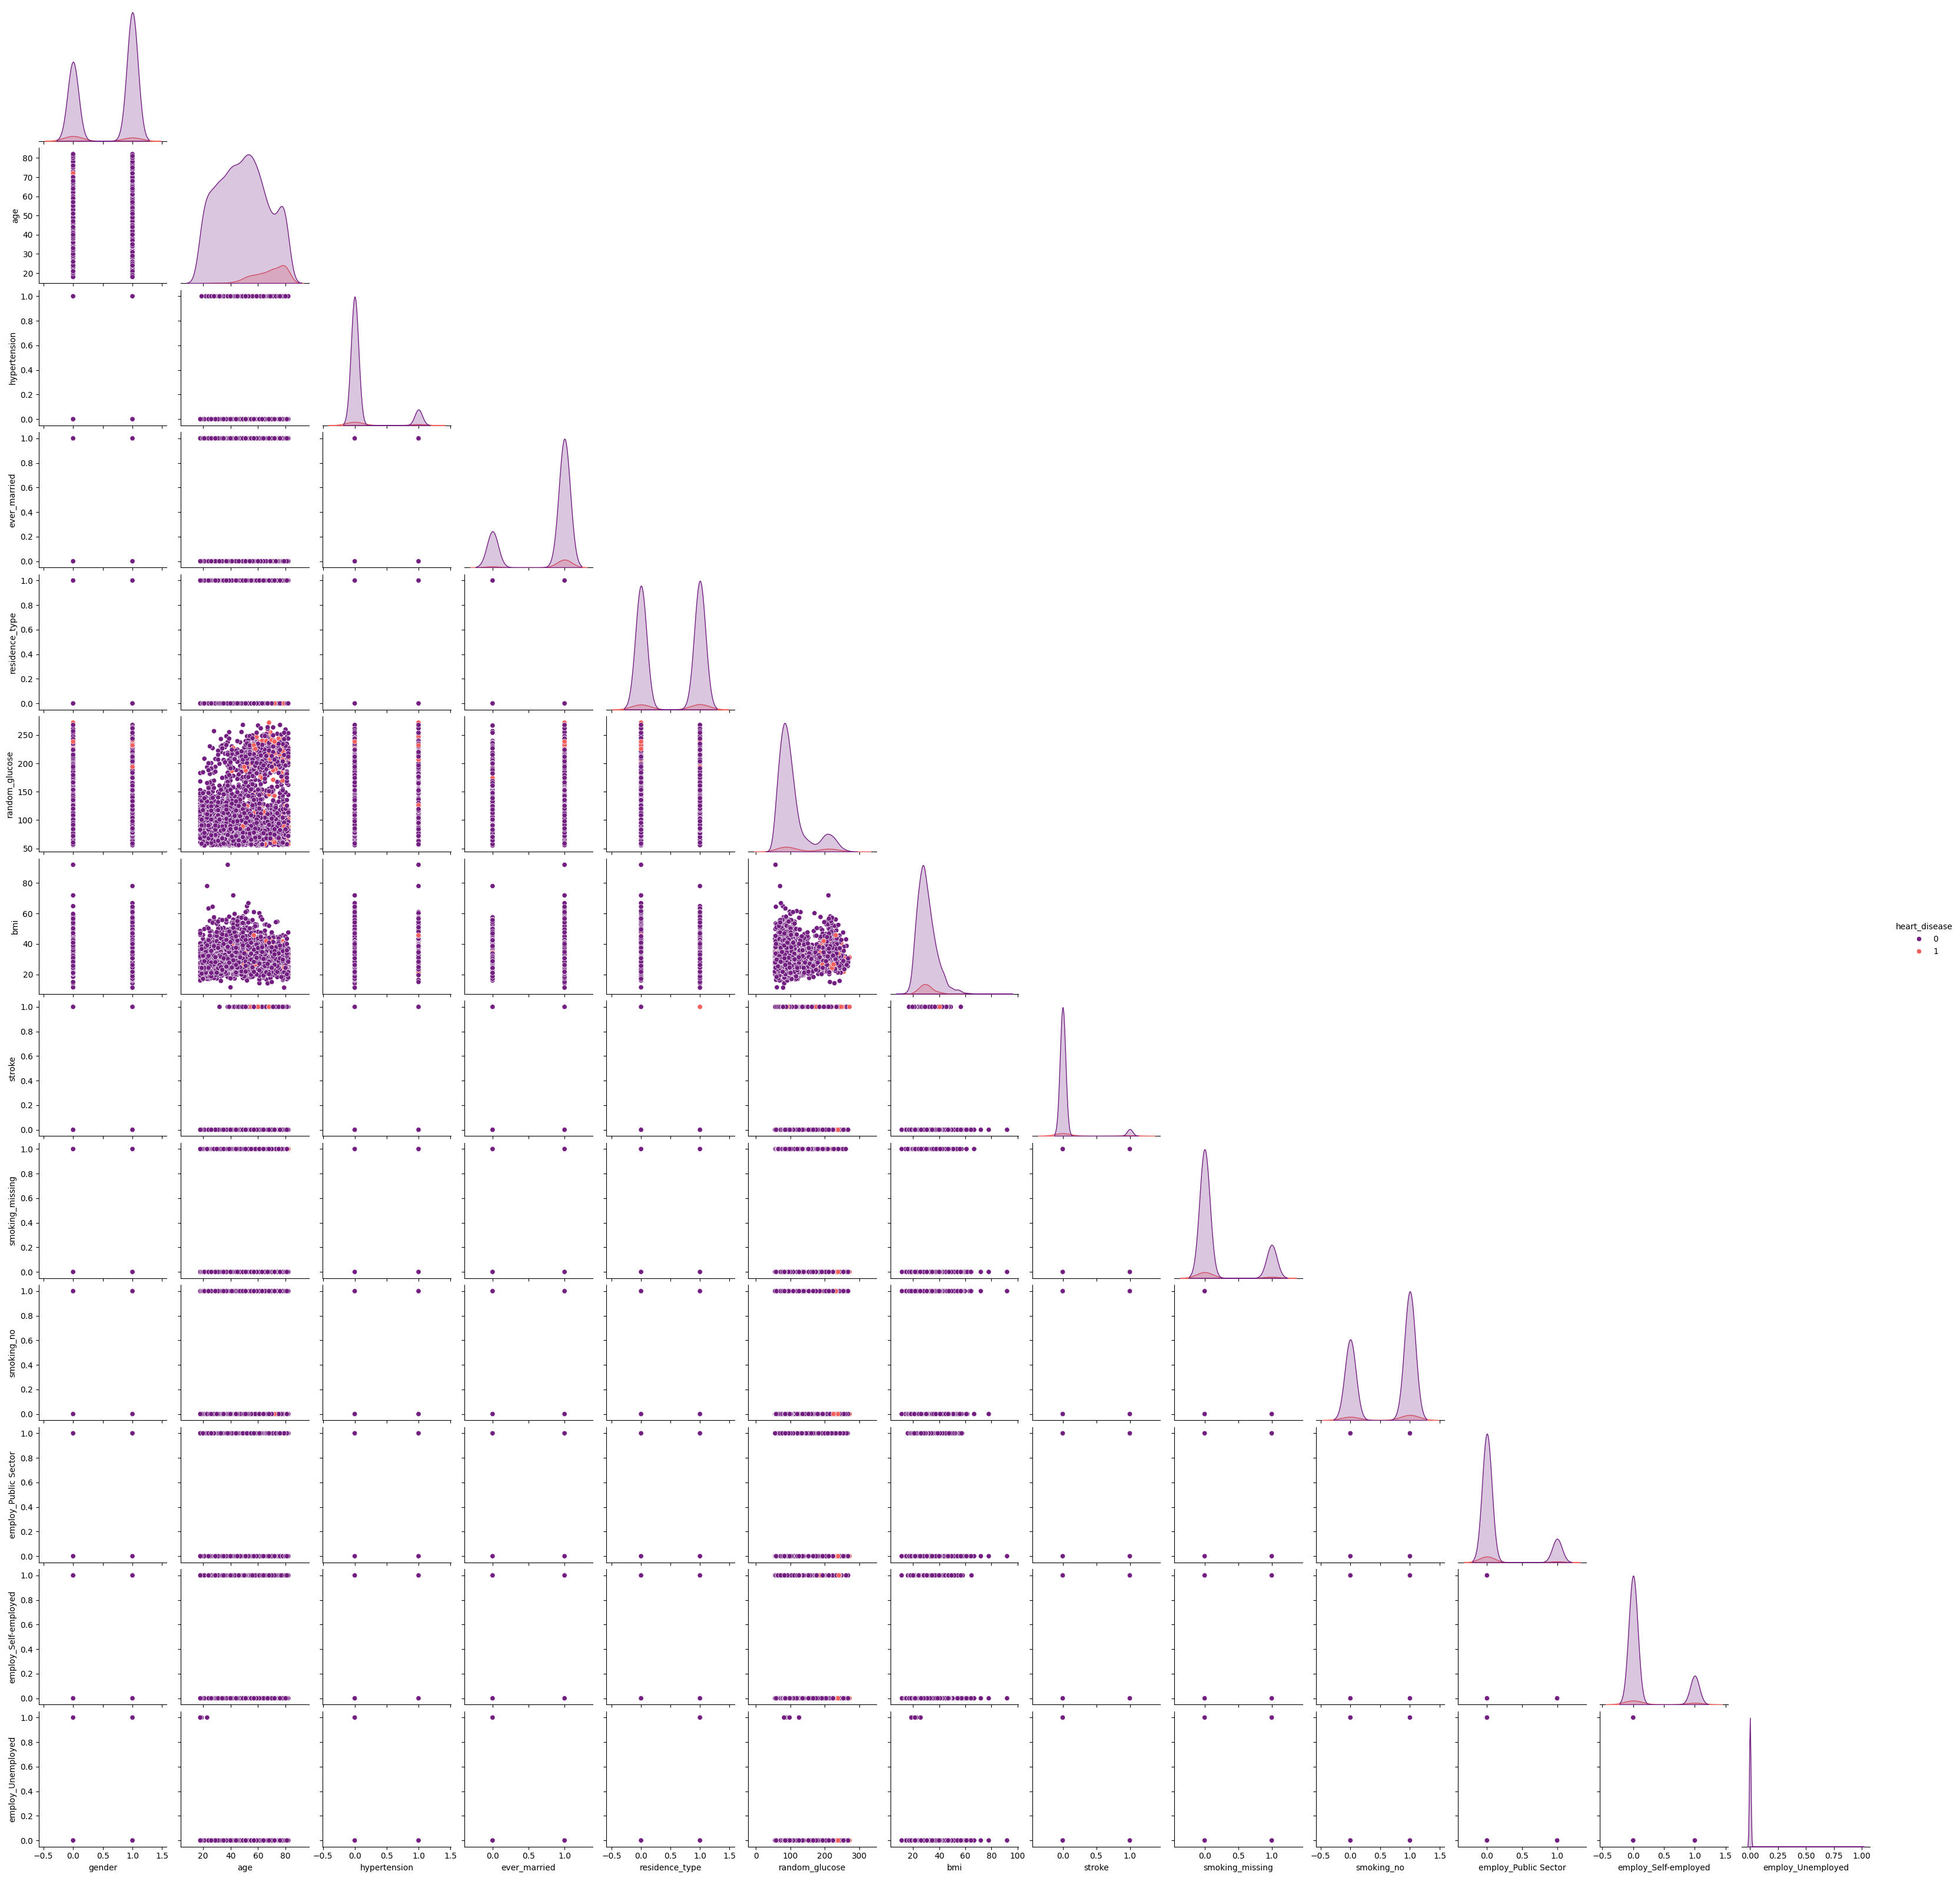

In [ ]:
sns.pairplot(df, hue='heart_disease', palette="magma", corner=True) #corner=1 allows
plt.show()

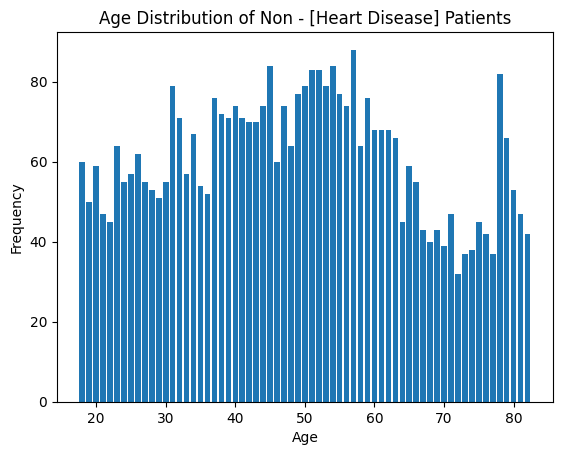

In [ ]:
age_counts = df[df['heart_disease'] == 0].groupby('age').size()

plt.bar(age_counts.index, age_counts.values)
plt.title('Age Distribution of Non - [Heart Disease] Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

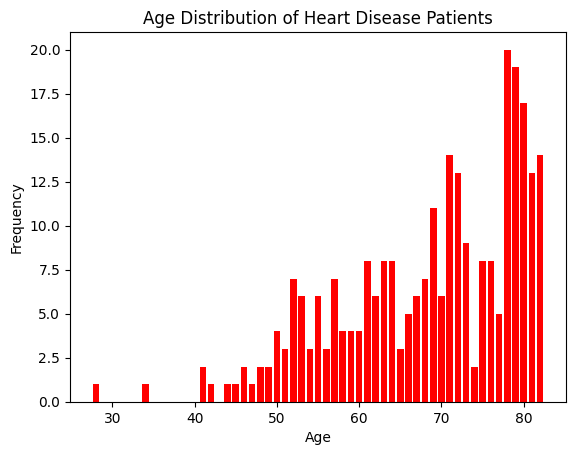

In [ ]:
age_counts = df[df['heart_disease'] == 1].groupby('age').size()

plt.bar(age_counts.index, age_counts.values, color='red')
plt.title('Age Distribution of Heart Disease Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df1 = df.dropna()
df1.head()

,gender,age,hypertension,heart_disease,ever_married,residence_type,random_glucose,bmi,stroke,smoking_missing,smoking_no,employ_Public Sector,employ_Self-employed,employ_Unemployed
0,0.0,67,0,1,1,1,228.69,36.6,1,0,1,0,0,0
2,0.0,80,0,1,1,0,105.92,32.5,1,0,1,0,0,0
3,1.0,49,0,0,1,1,171.23,34.4,1,0,0,0,0,0
4,1.0,79,1,0,1,0,174.12,24.0,1,0,1,0,1,0
5,0.0,81,0,0,1,1,186.21,29.0,1,0,1,0,0,0


In [ ]:
df1.shape

(4072, 14)

In [ ]:
df1 = df1[df1['age']>=40]
df1.shape

(2795, 14)

# Assessing Multi-Collinearity


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Prepare predictors (exclude target)
X = df1.drop(columns=['heart_disease'])

# Add constant for VIF calculation
X_const = add_constant(X)

# VIF -  Variance Inflation Factor, measures multicollinearity in regression models
# Compute VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                    for i in range(X_const.shape[1])]

# Display VIF results
print(vif_data)


                 feature        VIF
0                  const  68.849163
1                 gender   1.007281
2                    age   1.207395
3           hypertension   1.074461
4           ever_married   1.003830
5         residence_type   1.003494
6         random_glucose   1.108418
7                    bmi   1.082014
8                 stroke   1.064911
9        smoking_missing   1.717153
10            smoking_no   1.724970
11  employ_Public Sector   1.073027
12  employ_Self-employed   1.131371
13     employ_Unemployed        NaN


In [ ]:
df2=df1.drop(['employ_Public Sector', 'employ_Unemployed', 'employ_Self-employed'],axis=1)

In [ ]:
# Checking Class Imbalance
print("Class counts:")
print(df1['heart_disease'].value_counts())

print("\nClass proportions:")
print(df1['heart_disease'].value_counts(normalize=True))

Class counts:
heart_disease
0    2554
1     241
Name: count, dtype: int64

Class proportions:
heart_disease
0    0.913775
1    0.086225
Name: proportion, dtype: float64


# Logistic Regression Model

In [ ]:
# Split the data into features and target variable
X = df2.drop(['heart_disease'], axis=1)
y = df2['heart_disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

In [ ]:
X_train.shape

(2236, 10)

In [ ]:
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight="balanced")
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

# Model Evaluation

In [ ]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[357 155]
 [  8  39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.70      0.81       512
           1       0.20      0.83      0.32        47

    accuracy                           0.71       559
   macro avg       0.59      0.76      0.57       559
weighted avg       0.91      0.71      0.77       559



In [ ]:
# Get predicted probabilities for the positive class
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"The AUC score for the logistic regression model is: {auc_score:.4f}")

The AUC score for the logistic regression model is: 0.8098


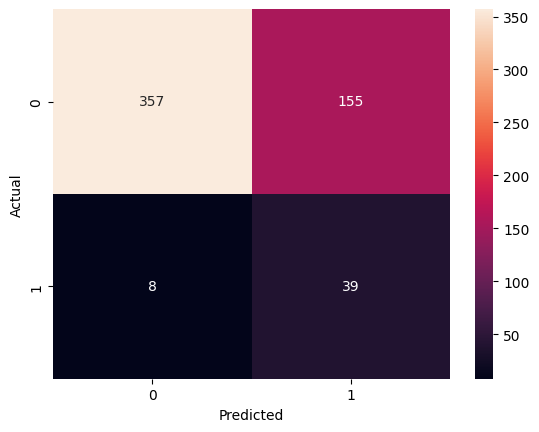

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Logistic Regression Model Summary

In [ ]:
import statsmodels.api as sm

# Separate features and target variable
X = df2.drop(['heart_disease'], axis=1)
y = df2['heart_disease']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.252467
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          heart_disease   No. Observations:                 2795
Model:                          Logit   Df Residuals:                     2784
Method:                           MLE   Df Model:                           10
Date:                Wed, 28 Jan 2026   Pseudo R-squ.:                  0.1404
Time:                        16:05:42   Log-Likelihood:                -705.65
converged:                       True   LL-Null:                       -820.94
Covariance Type:            nonrobust   LLR p-value:                 6.477e-44
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.1438      0.672     -9.137      0.000      -7.462      -4.826
gender        

# Further Exploration of the Features

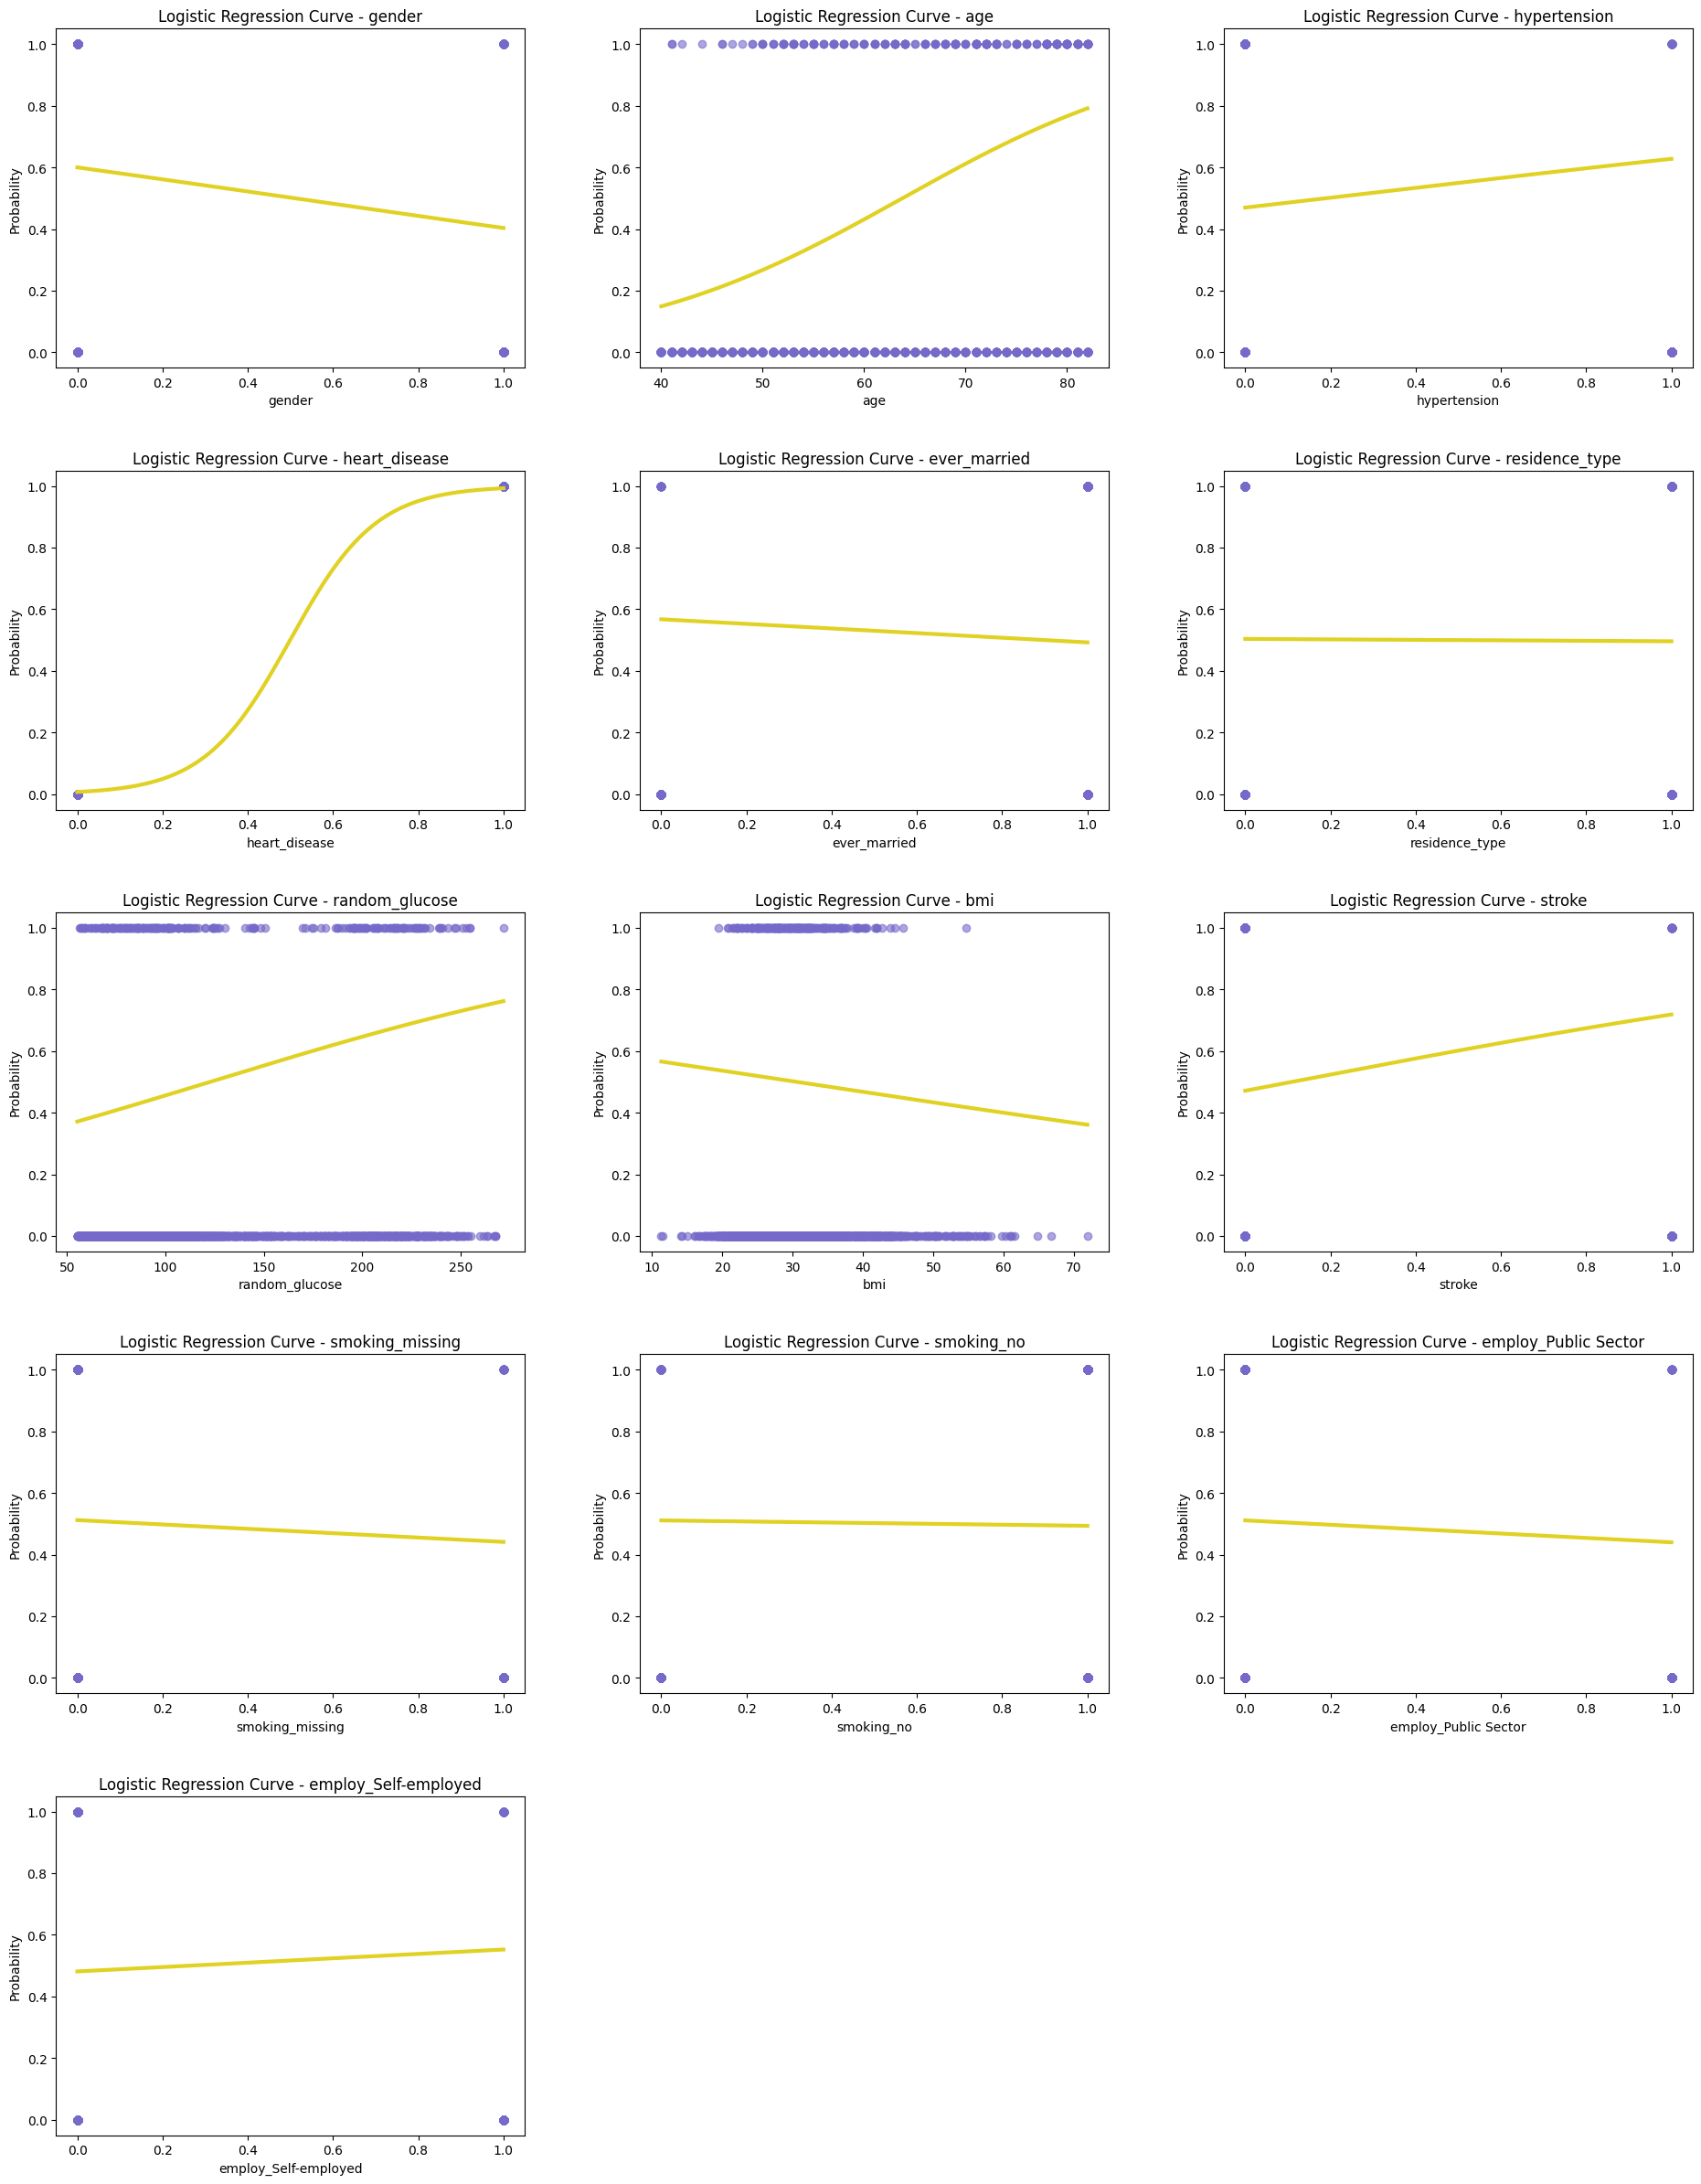

In [ ]:
import math

log_reg = LogisticRegression(class_weight="balanced")

n_features = len(df1.columns) - 1  # exclude target
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axs = axs.flatten()
fig.tight_layout(pad=6.0)

for i, feature in enumerate(df1.columns[:-1]):
    X = df1[[feature]]
    y = df1['heart_disease']

    log_reg.fit(X, y)

    x_test = np.linspace(
        X.min().values[0],
        X.max().values[0],
        300
    ).reshape(-1, 1)

    prob = log_reg.predict_proba(x_test)[:, 1]

    axs[i].scatter(X, y, color='#7569c9', alpha=0.6)
    axs[i].plot(x_test, prob, color='#e0d122', lw=3)

    axs[i].set_title(f'Logistic Regression Curve - {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Probability')

# Remove unused subplots (if any)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.show()


In [ ]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,residence_type,random_glucose,bmi,stroke,smoking_missing,smoking_no,employ_Public Sector,employ_Self-employed,employ_Unemployed
0,0.0,67,0,1,1,1,228.69,36.6,1,0,1,0,0,0
2,0.0,80,0,1,1,0,105.92,32.5,1,0,1,0,0,0
3,1.0,49,0,0,1,1,171.23,34.4,1,0,0,0,0,0
4,1.0,79,1,0,1,0,174.12,24.0,1,0,1,0,1,0
5,0.0,81,0,0,1,1,186.21,29.0,1,0,1,0,0,0


In [ ]:
df1['employ_Unemployed'].value_counts()

,count
employ_Unemployed,
0,2795
